# Session 3: Signal analysis

In [2]:
%matplotlib widget

import numpy as np
from numpy import histogram
import matplotlib.pyplot as plt

# hint: more packages will be neccessary later

## Exercise 3.1

In [3]:
# todo: your code here
# insert as many cells as you like

#noise sequences
x1 = np.random.rand(10**6) * 4  # Scale to have max amplitude of 2 around mean 2
x2 = np.random.randn(10**6) * np.sqrt(0.5) + 2  # Gaussian noise with variance 0.5 and mean 2
x3 = np.random.randn(10**6) * np.sqrt(1.5) + 2  # Gaussian noise with variance 1.5 and mean 2

#confirm mean and variance properties
print("Mean of x1:", np.mean(x1))
print("Max amplitude of x1 around mean:", np.max(x1)-np.mean(x1))
print("Mean of x2:", np.mean(x2))
print("Variance of x2:", np.var(x2))
print("Mean of x3:", np.mean(x3))
print("Variance of x3:", np.var(x3))

Mean of x1: 2.001138675011681
Max amplitude of x1 around mean: 1.9988585419010185
Mean of x2: 2.0001502608722865
Variance of x2: 0.4998172976324712
Mean of x3: 1.9985491109387106
Variance of x3: 1.4985106686238374


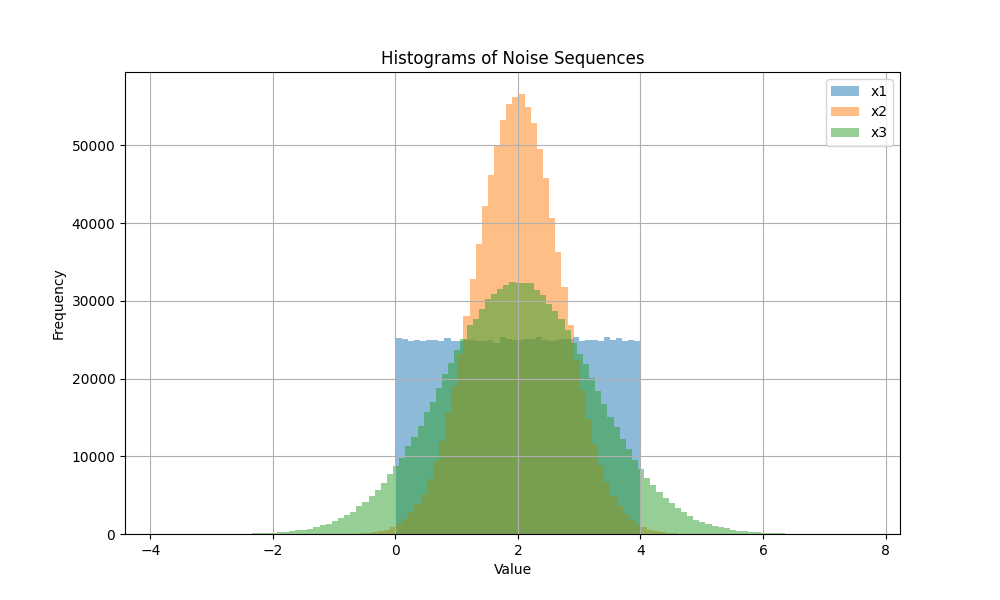

In [4]:
#histograms
plt.figure(figsize=(10, 6))
w = 0.1
plt.hist(x1, bins=np.arange(min(x1), max(x1) + w, w), alpha=0.5, label='x1')
plt.hist(x2, bins=np.arange(min(x2), max(x2) + w, w), alpha=0.5, label='x2')
plt.hist(x3, bins=np.arange(min(x3), max(x3) + w, w), alpha=0.5, label='x3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Noise Sequences')
plt.legend()
plt.grid(True)
plt.show()

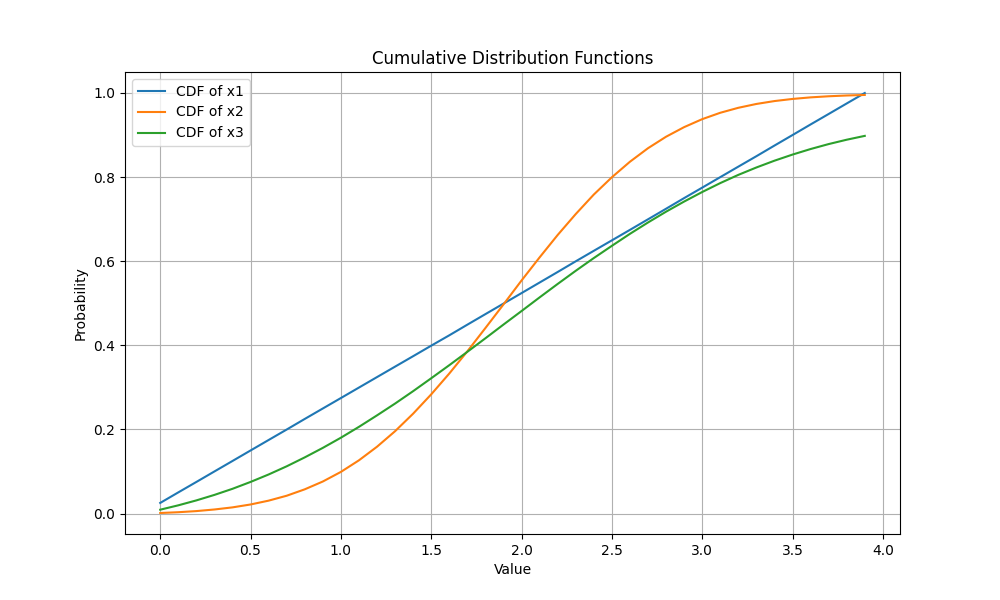

In [5]:
#PDFs
counts1, _ = np.histogram(x1, bins=np.arange(0, 4.1, 0.1))
counts2, _ = np.histogram(x2, bins=np.arange(0, 4.1, 0.1))
counts3, _ = np.histogram(x3, bins=np.arange(0, 4.1, 0.1))
total_counts = len(x1)

pdf1 = counts1 / total_counts
pdf2 = counts2 / total_counts
pdf3 = counts3 / total_counts

#CDFs
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)
cdf3 = np.cumsum(pdf3)

#plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 4, 0.1), cdf1, label='CDF of x1')
plt.plot(np.arange(0, 4, 0.1), cdf2, label='CDF of x2')
plt.plot(np.arange(0, 4, 0.1), cdf3, label='CDF of x3')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Functions')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#probabilities
prob_x1_geq_1 = 1 - cdf1[int(1 / 0.1)]
prob_x2_geq_1 = 1 - cdf2[int(1 / 0.1)]
prob_x3_geq_1 = 1 - cdf3[int(1 / 0.1)]

print("Probability of x1 >= 1:", prob_x1_geq_1)
print("Probability of x2 >= 1:", prob_x2_geq_1)
print("Probability of x3 >= 1:", prob_x3_geq_1)

Probability of x1 >= 1: 0.725355
Probability of x2 >= 1: 0.901004
Probability of x3 >= 1: 0.819693


## Exercise 3.2

Section in ms: 100.0


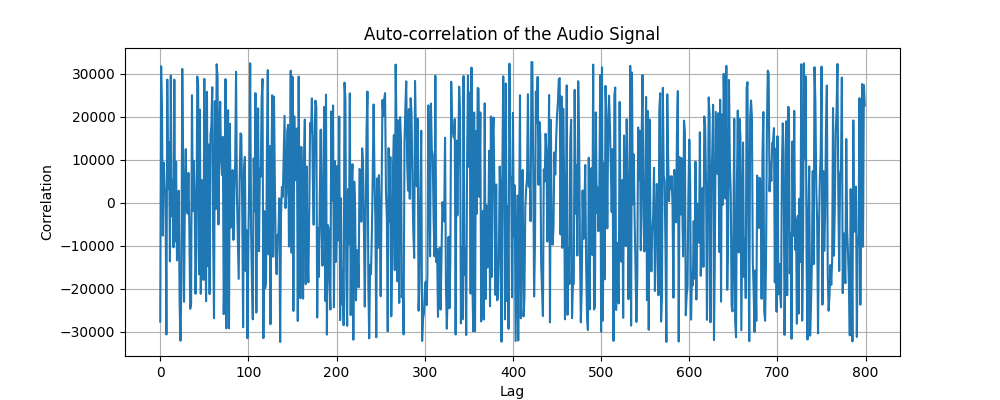

(100.0,
 52.625,
 'y1',
 {'y1': {'shift': 0.08, 'scale': 1.0032154423814101},
  'y2': {'shift': 0.0, 'scale': 1.0},
  'y3': {'shift': -0.08, 'scale': 2.0}})

In [7]:
#Load voice.wav
from scipy.io import wavfile
from scipy.signal import correlate

# Load the audio file
sampling_rate, data = wavfile.read('voice1.wav')

# Calculate the duration of the audio in milliseconds
duration_ms = (len(data) / sampling_rate) * 1000
print ("Section in ms:",duration_ms)

# Calculate the auto-correlation of the audio signal
auto_corr = correlate(data, data, mode='full')
auto_corr = auto_corr[auto_corr.size // 2:]  # Keep only the second half

# Display the auto-correlation graphically
plt.figure(figsize=(10, 4))
plt.plot(auto_corr)
plt.title('Auto-correlation of the Audio Signal')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Find the first sidelobe to determine the pitch period
# This can be done by finding the first local maximum after the central peak
peak_index = np.argmax(auto_corr[1:]) + 1  # Skip the very first index which is the central peak
pitch_period_ms = (peak_index / sampling_rate) * 1000  # Convert to milliseconds

# Load the .npz file containing the sequences
sequences = np.load('sequences.npz')
x = sequences['x']
y1 = sequences['y1']
y2 = sequences['y2']
y3 = sequences['y3']

# Assuming 'x' is the original sequence, we will compare 'y1', 'y2', and 'y3' with 'x' to
# determine the scaling and shifting. We will also determine which sequence is uncorrelated.
# This would involve computing the correlation coefficient between 'x' and the other sequences.

corr_x_y1 = np.corrcoef(x, y1)[0, 1]
corr_x_y2 = np.corrcoef(x, y2)[0, 1]
corr_x_y3 = np.corrcoef(x, y3)[0, 1]

# Determine which one is least correlated (i.e., close to 0)
min_corr = min(abs(corr_x_y1), abs(corr_x_y2), abs(corr_x_y3))
uncorrelated_seq = 'y1' if min_corr == abs(corr_x_y1) else ('y2' if min_corr == abs(corr_x_y2) else 'y3')

# To find the shift and scaling factor, we would typically look for patterns such as a consistent
# offset or a consistent ratio between the elements of 'x' and the 'y' sequences. For simplicity,
# here we'll use the mean and standard deviation to infer scaling and shifting.
shift_scale_info = {
    'y1': {'shift': np.mean(y1 - x), 'scale': np.std(y1) / np.std(x)},
    'y2': {'shift': np.mean(y2 - x), 'scale': np.std(y2) / np.std(x)},
    'y3': {'shift': np.mean(y3 - x), 'scale': np.std(y3) / np.std(x)},
}

# Print the results
duration_ms, pitch_period_ms, uncorrelated_seq, shift_scale_info

In [7]:
f = np.load('sequences.npz')
x = f['x']
y1 = f['y1']
y2 = f['y2']
y3 = f['y3']

## Exercise 3.3

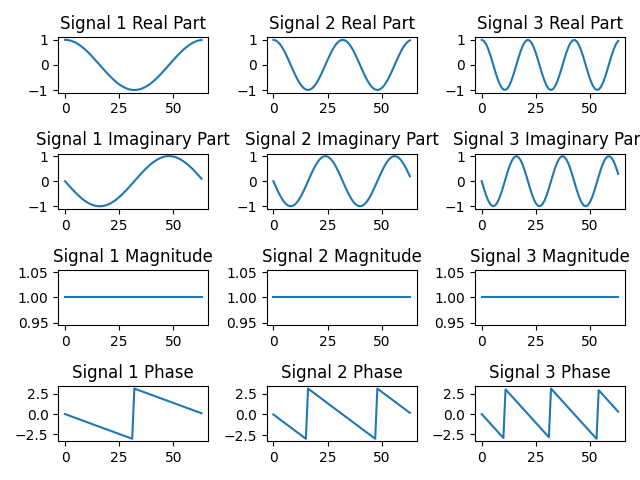

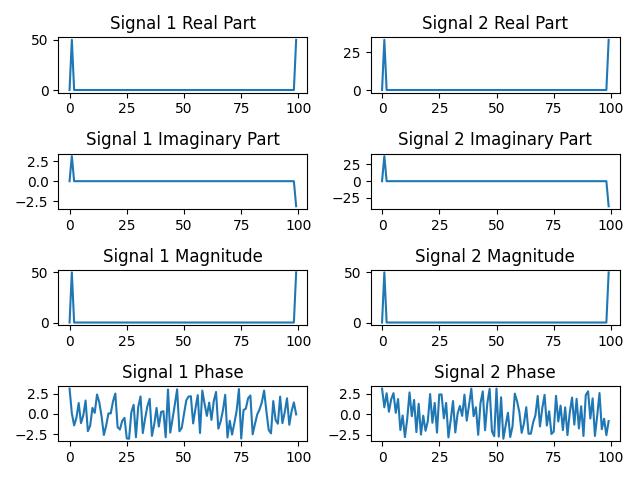

In [8]:
def show_parts(x, name):
    pass

def show_fft(x):
    # Compute Fourier Transforms
    X = np.fft.fft(x)
    #print(np.shape(X))

    # Plot results
    fig, axs = plt.subplots(4, np.shape(X)[0])
    titles = ['Real Part', 'Imaginary Part', 'Magnitude', 'Phase']
    for i in range(np.shape(X)[0]):
        axs[0][i].plot(np.real(X[i]))
        axs[0][i].set_title(f'Signal {i+1} Real Part')
        
        axs[1][i].plot(np.imag(X[i]))
        axs[1][i].set_title(f'Signal {i+1} Imaginary Part')
        
        axs[2][i].plot(np.abs(X[i]))
        axs[2][i].set_title(f'Signal {i+1} Magnitude')
        
        axs[3][i].plot(np.angle(X[i]))
        axs[3][i].set_title(f'Signal {i+1} Phase')

    plt.tight_layout()
    plt.show()

def create_vectors(N, n):
    # Calculate Omega_0 and Omega_1 for each n value based on the given formulas
    Omega_0 = 2 * np.pi * n / N  
    Omega_1 = Omega_0 + (np.pi/4)  # Adding an arbitrary value to make it not an integer multiple of 2*pi/N

    # Calculate x(k) for each Omega value
    xk_0 = np.cos(Omega_0)
    xk_1 = np.cos(Omega_1)

    return xk_0, xk_1

N = 64
x = np.zeros((3, N))

# Generate signals
for i in range(3):
    x[i][i+1] = 1

show_fft(x)

# Set an arbitrary N
N2 = 100

# Set n values for the two cases
n = np.arange(1, N2+1)  # n values range from 1 to N

xk_0, xk_1 = create_vectors(N2, n)

#print("x(k) with Omega_0:", xk_0)
#print("x(k) with Omega_1:", xk_1)

x = np.zeros((2, N2))

# Generate signals
x[0][:] = xk_0
x[1][:] = xk_1

show_fft(x)

#explanation of the figures missing

## Exercise 3.4

[ 1.          0.07803583 -1.00003052 ... -0.35285501 -0.53746147
  0.06363109]
8000
Peak heights:  [2931.72941484 1458.02072168 1354.13951677]


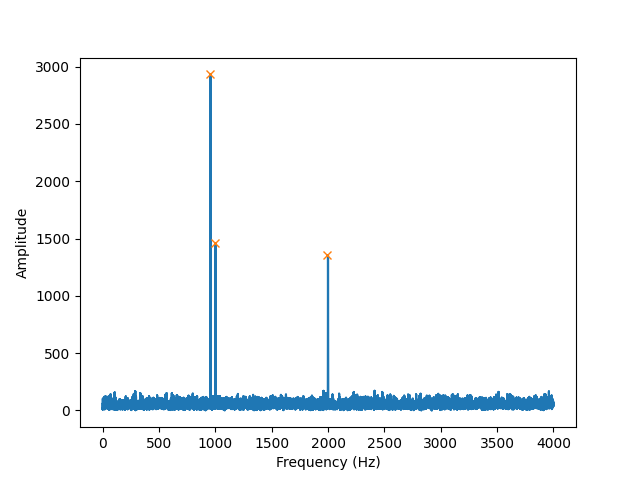

Peak frequencies (Hz): [956.1752988047809, 996.0159362549801, 1992.0318725099603]


In [9]:
import soundfile as sf
import sounddevice as sd
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import find_peaks

# Load the file
rate, data = wavfile.read('distorted.wav')
#sd.play(data,rate)
data2 = data / np.max(abs(data),axis=0)
sd.play(data,rate)
print(data2)
print(rate)
# Compute Fourier transform
frequencies = np.fft.fftfreq(np.size(data2), 1/rate)
fft_values = np.fft.fft(data2)

# Find peaks
peaks, peakprops = find_peaks(np.abs(fft_values[:len(fft_values)//2]), height=200)
peaks2 = [x / 1.255 for x in peaks]
#print(peaks2)
print("Peak heights: ",peakprops["peak_heights"])
#print(np.size(frequencies))

# Plot the spectrum
plt.figure()
plt.plot(np.abs(frequencies), np.abs(fft_values))
plt.plot(peaks2, np.abs(fft_values)[peaks], "x")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Print peak frequencies
print("Peak frequencies (Hz):", peaks2)

## Exercise 3.5

In [9]:
from scipy.signal import spectrogram

def compare_specs(x, fs, params_default, **kwargs):
    pass

In [10]:
params_default=dict(nperseg=512, noverlap=0, nfft=None, window='rect')

In [11]:
# YOUR CODE HERE